<a href="https://colab.research.google.com/github/reemamemon/ML_Task2/blob/main/CarPricePrediction_usingML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Set warnings to be ignored
warnings.filterwarnings("ignore")

**Read dataset**

In [26]:
df = pd.read_csv("/content/car_price_prediction.csv")
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


**Data Analysis**

In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [29]:
# Count null values in each column
null_counts = df.isnull().sum()

# Display the result
print(null_counts)

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


**Data Clean up**

In [30]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG    

In [31]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

In [32]:
df=df_no_duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [33]:
# drop ID column
df = df.drop(columns=['ID'])

In [34]:
df['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [36]:
# Replace '-' with NaN in the 'Levy' column
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = df['Levy'].astype(float)

In [37]:
from sklearn.impute import KNNImputer

# Replace the missing values in Levy with knn imputer
impute = KNNImputer(n_neighbors=5)
df['Levy'] = impute.fit_transform(df['Levy'].values.reshape(-1,1))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

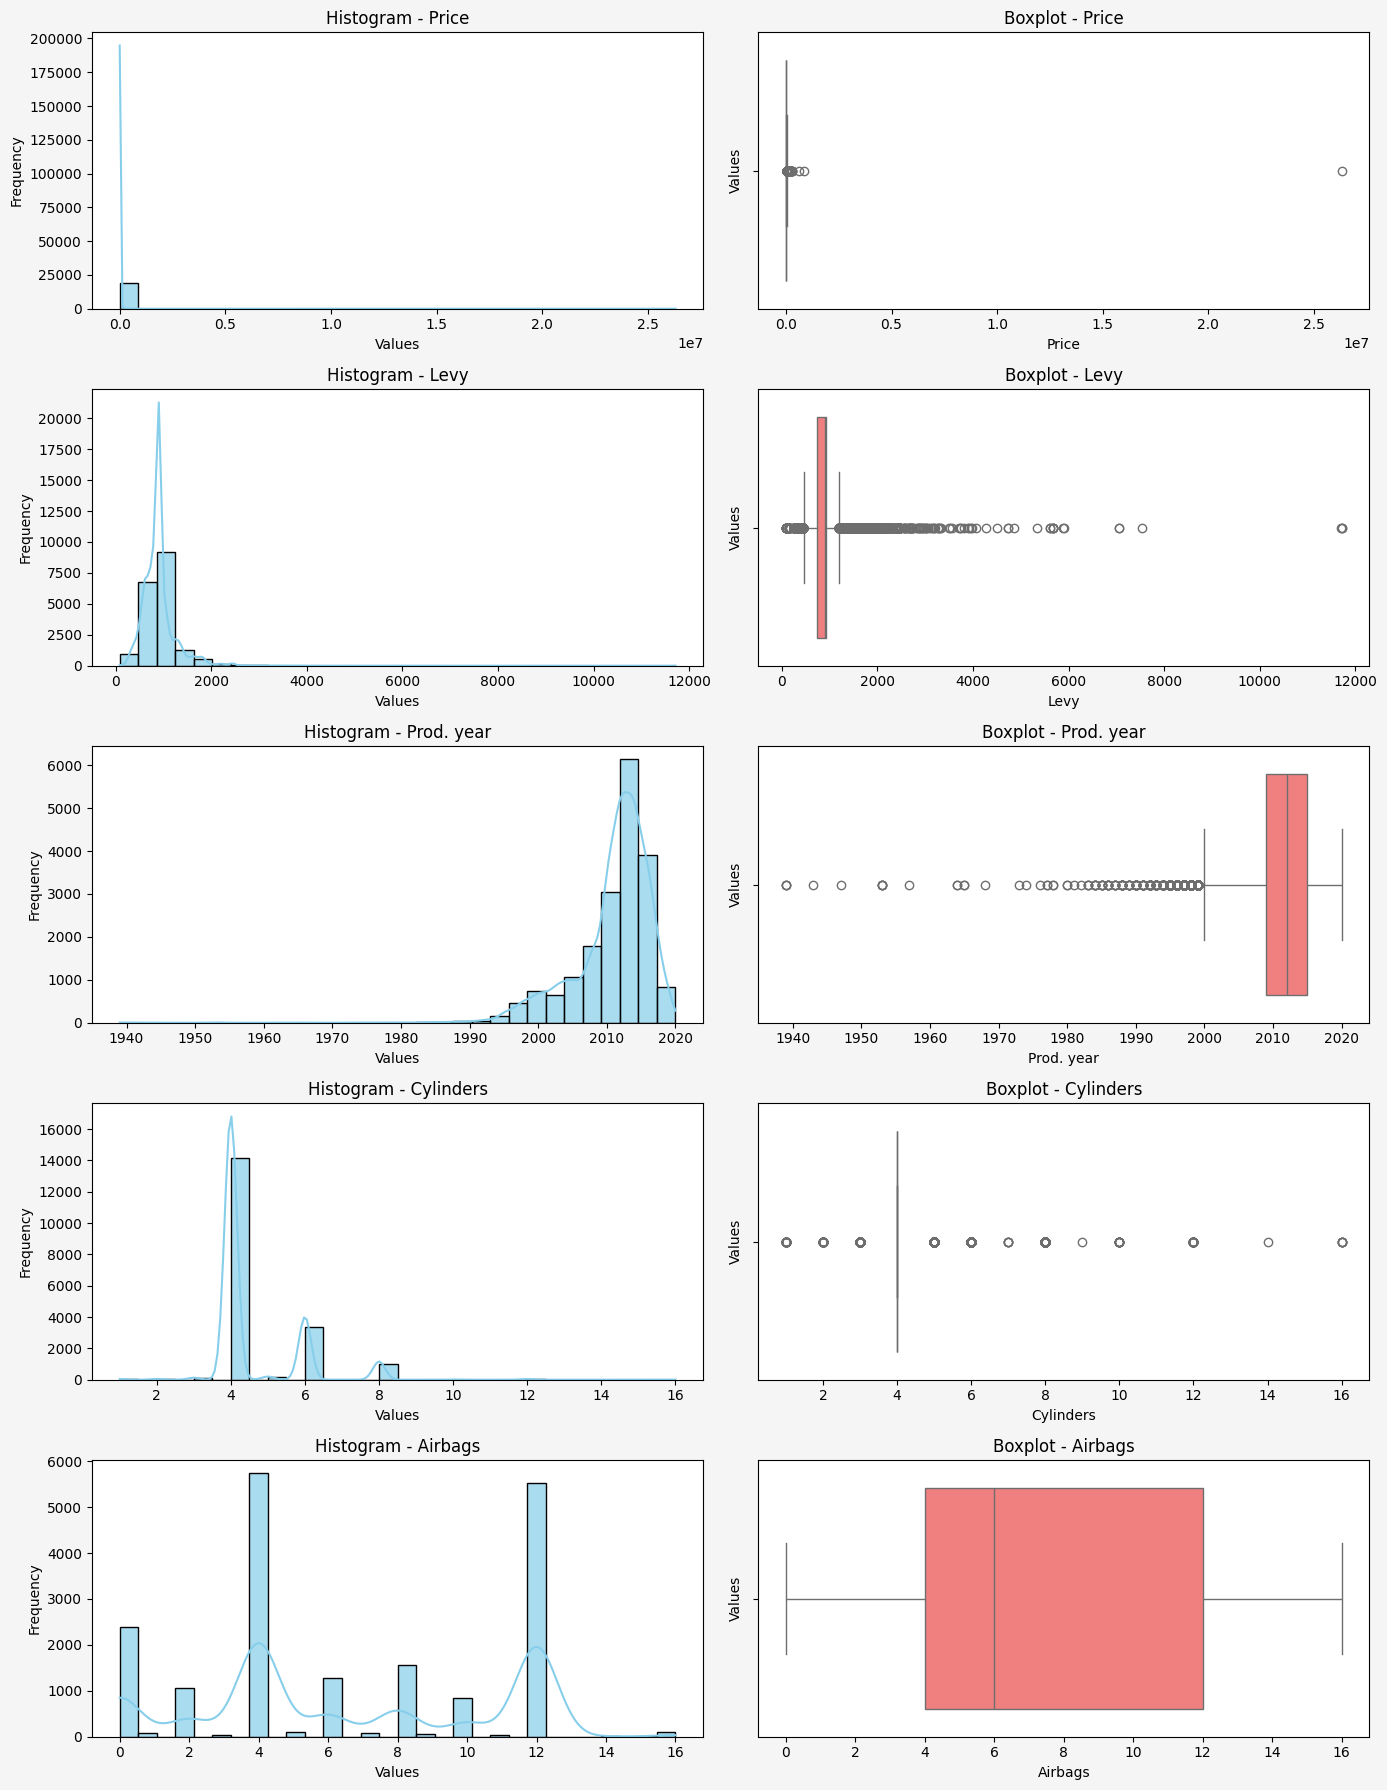

In [38]:
# Select only numerical columns with int64 and float64 data types
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Set up a 5x2 grid of subplots with a light gray background
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18), facecolor='whitesmoke')

# Iterate through numerical columns and create histograms and boxplots
for i, column in enumerate(numerical_columns.columns):
    # Histogram
    sns.histplot(df[column], bins=30, color='skyblue', alpha=0.7, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram - {column}')
    axes[i, 0].set_xlabel('Values')
    axes[i, 0].set_ylabel('Frequency')
     # Boxplot
    sns.boxplot(x=df[column], ax=axes[i, 1], color='lightcoral', boxprops=dict(facecolor='lightcoral'))
    axes[i, 1].set_title(f'Boxplot - {column}')
    axes[i, 1].set_ylabel('Values')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**Finding Outliers in Target: **The Interquartile Range (IQR) method is a statistical technique for identifying outliers in a dataset. It involves the following steps:

Calculate Quartiles:

Divide the dataset into quartiles, specifically the first quartile (Q1) and the third quartile (Q3). Q1 represents the 25th percentile, and Q3 represents the 75th percentile.

Calculate IQR:

Determine the Interquartile Range (IQR) by subtracting Q1 from Q3: IQR=Q3−Q1.

Define Lower and Upper Bounds:

Establish lower and upper bounds to identify potential outliers.

Lower Bound: Q1−1.5×IQR

Upper Bound: Q3+1.5×IQR

Identify Outliers:

Any data point below the lower bound or above the upper bound is considered a potential outlier.

In [39]:
# Assuming df is your DataFrame
price_column = df['Price']

# Calculate the IQR (Interquartile Range)
Q1 = price_column.quantile(0.25)
Q3 = price_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (price_column < lower_bound) | (price_column > upper_bound)

# Count and print the number of outliers
num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers]

Number of outliers: 1055


In [40]:
df=df_no_outliers
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


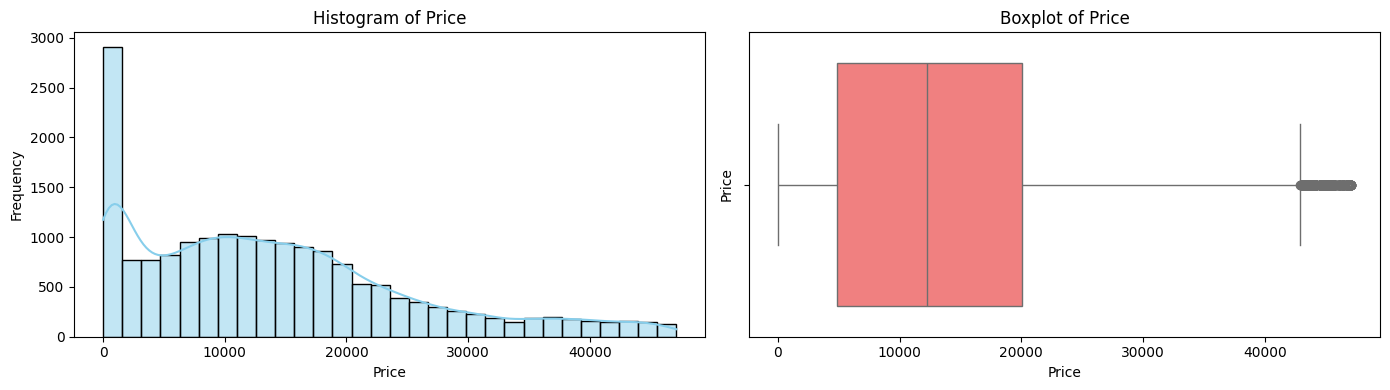

In [41]:
# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Histogram
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['Price'], color='lightcoral', ax=axes[1], boxprops=dict(facecolor='lightcoral'))
axes[1].set_title('Boxplot of Price')
axes[1].set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Analyze Categorical columns and Features Engineering**

In [42]:
df['Manufacturer'].value_counts()

TOYOTA           3502
HYUNDAI          3425
MERCEDES-BENZ    1874
FORD             1035
CHEVROLET        1021
                 ... 
PONTIAC             1
LANCIA              1
FERRARI             1
HAVAL               1
GREATWALL           1
Name: Manufacturer, Length: 61, dtype: int64

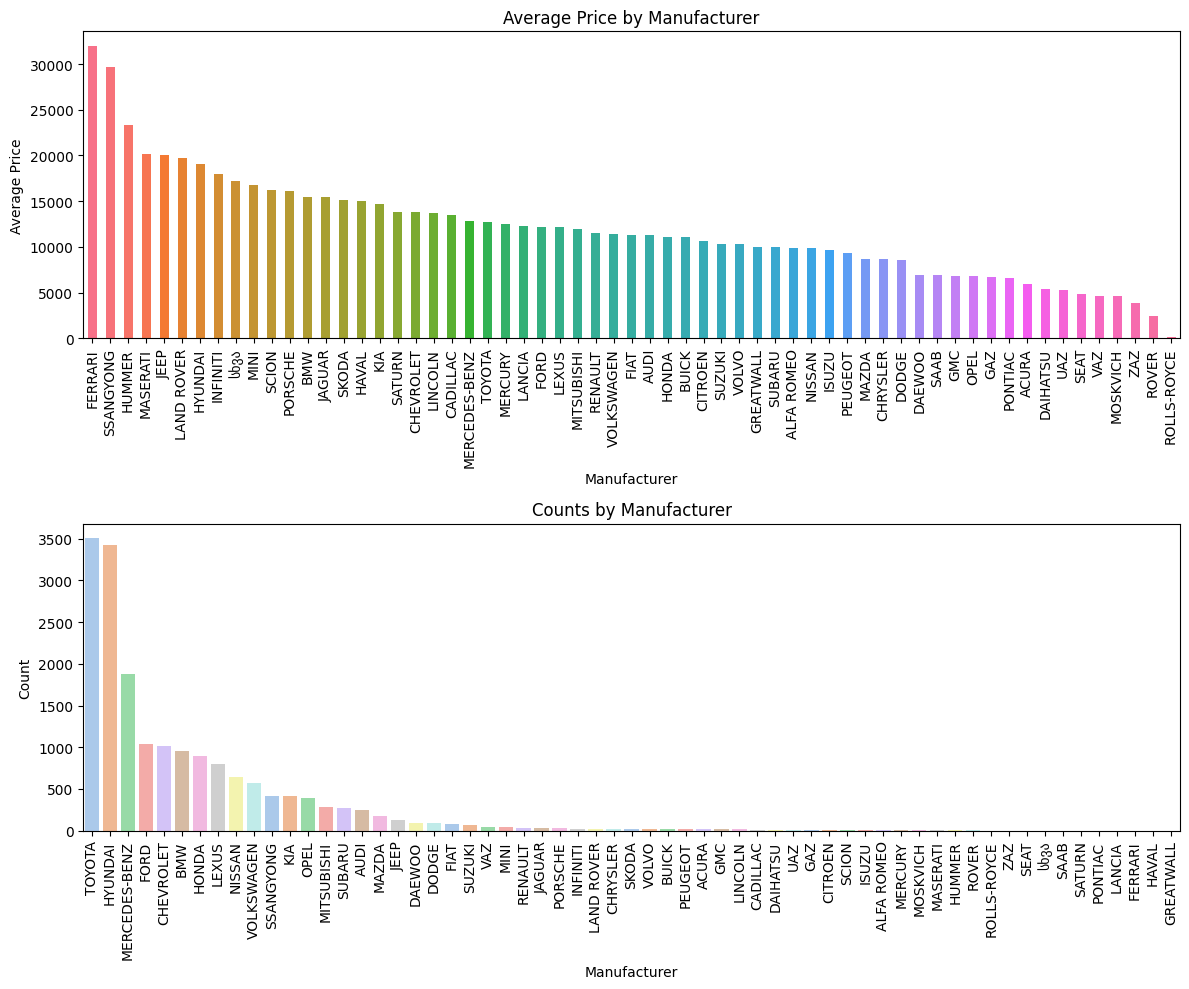

In [43]:
average_price_by_manufacturer = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
manufacturer_counts = df['Manufacturer'].value_counts().loc[average_price_by_manufacturer.index]

# Set up a 2x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Bar plot (Average Price by Manufacturer)
colors_bar = sns.color_palette('husl', len(average_price_by_manufacturer))
average_price_by_manufacturer.plot(kind='bar', color=colors_bar, ax=axes[0])
axes[0].set_title('Average Price by Manufacturer')
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Average Price')

# Countplot (Counts by Manufacturer)
colors_count = sns.color_palette('pastel')
sns.countplot(x='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index, palette=colors_count, ax=axes[1])
axes[1].set_title('Counts by Manufacturer')
axes[1].set_xlabel('Manufacturer')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels
# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [44]:
df['Model'].value_counts()

Prius                     1068
Sonata                    1007
Elantra                    907
Camry                      905
E 350                      526
                          ... 
Golf 2                       1
GLK 300                      1
Musa                         1
1500,1600 Schtufenheck       1
Prius C aqua                 1
Name: Model, Length: 1498, dtype: int64

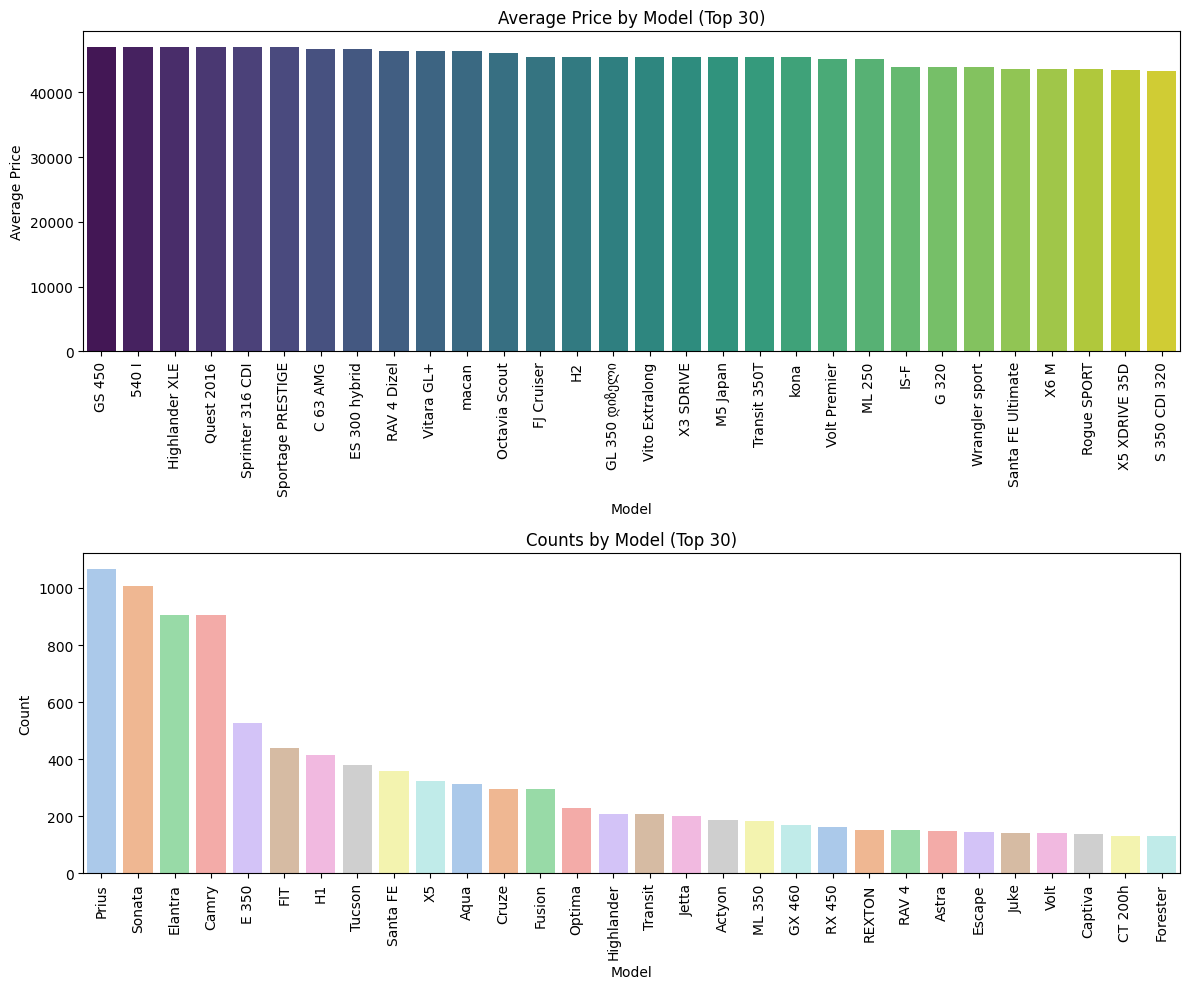

In [45]:
# Calculate average price by model
average_price_by_model = df.groupby('Model')['Price'].mean().sort_values(ascending=False)

# Select the top 30 models by average price
top_average_price_models = average_price_by_model.head(30).index

# Set up a 2x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Bar plot (Average Price by Model - Top 30)
colors_price = sns.color_palette('viridis', len(top_average_price_models))
sns.barplot(x='Model', y='Price', data=df[df['Model'].isin(top_average_price_models)].sort_values('Price', ascending=False),
            palette=colors_price, ax=axes[0])
axes[0].set_title('Average Price by Model (Top 30)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Average Price')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels
# Countplot (Counts by Model - Top 30)
top_count_models = df['Model'].value_counts().head(30).index
colors_count = sns.color_palette('pastel')
sns.countplot(x='Model', data=df[df['Model'].isin(top_count_models)].sort_values('Model'), order=top_count_models,
              palette=colors_count, ax=axes[1])
axes[1].set_title('Counts by Model (Top 30)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [46]:
df['Category'].value_counts()

Sedan          8318
Jeep           4736
Hatchback      2781
Minivan         620
Coupe           477
Universal       339
Microbus        290
Goods wagon     227
Pickup           41
Cabriolet        29
Limousine        11
Name: Category, dtype: int64

In [47]:
df['Leather interior'].value_counts()

Yes    12737
No      5132
Name: Leather interior, dtype: int64

In [48]:
df['Fuel type'].value_counts()

Petrol            9309
Diesel            3634
Hybrid            3495
LPG                878
CNG                469
Plug-in Hybrid      83
Hydrogen             1
Name: Fuel type, dtype: int64

In [49]:
df['Engine volume'].value_counts()

2            3573
2.5          2167
1.8          1742
1.6          1428
1.5          1248
             ... 
4.2 Turbo       1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 103, dtype: int64

In [50]:
# Create a new column 'Turbo' based on the presence of 'Turbo' in 'Engine volume'
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)

# Remove 'Turbo' string from 'Engine volume' and convert to numerical
df['Engine volume'] = df['Engine volume'].replace('Turbo', '', regex=True).astype(float)

df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,906.299205,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [51]:
# Remove 'km' string from 'Mileage' and convert to numeric
df['Mileage'] = df['Mileage'].replace(' km', '', regex=True).astype(float)

In [52]:
df['Cylinders'].value_counts()

4.0     13524
6.0      3140
8.0       804
5.0       167
3.0       107
2.0        42
1.0        35
12.0       29
10.0       10
16.0        5
7.0         4
9.0         1
14.0        1
Name: Cylinders, dtype: int64

In [53]:
df['Gear box type'].value_counts()

Automatic    12593
Tiptronic     2736
Manual        1816
Variator       724
Name: Gear box type, dtype: int64

In [54]:
df['Drive wheels'].value_counts()

Front    12155
4x4       3589
Rear      2125
Name: Drive wheels, dtype: int64

In [55]:
df['Doors'].value_counts()

04-May    17028
02-Mar      729
>5          112
Name: Doors, dtype: int64

In [56]:
# Replace values in the 'Doors' column
df['Doors'] = df['Doors'].replace({'04-May': '4-5', '02-Mar': '2-3'})

In [57]:
df['Doors'] = df['Doors'].astype('category')

In [58]:
df['Doors'].value_counts()

4-5    17028
2-3      729
>5       112
Name: Doors, dtype: int64

In [59]:
df['Wheel'].value_counts()

Left wheel          16420
Right-hand drive     1449
Name: Wheel, dtype: int64

In [60]:
df['Color'].value_counts()

Black            4554
White            4143
Silver           3628
Grey             2167
Blue             1314
Red               606
Green             319
Orange            248
Carnelian red     173
Brown             168
Golden            139
Beige             130
Sky blue          121
Yellow             96
Purple             39
Pink               24
Name: Color, dtype: int64

In [61]:
df['Airbags'].value_counts()

4     5245
12    5241
0     2268
8     1530
6     1258
2     1044
10     788
5      102
7       83
16      79
1       76
9       60
3       37
11      32
14      18
15       6
13       2
Name: Airbags, dtype: int64

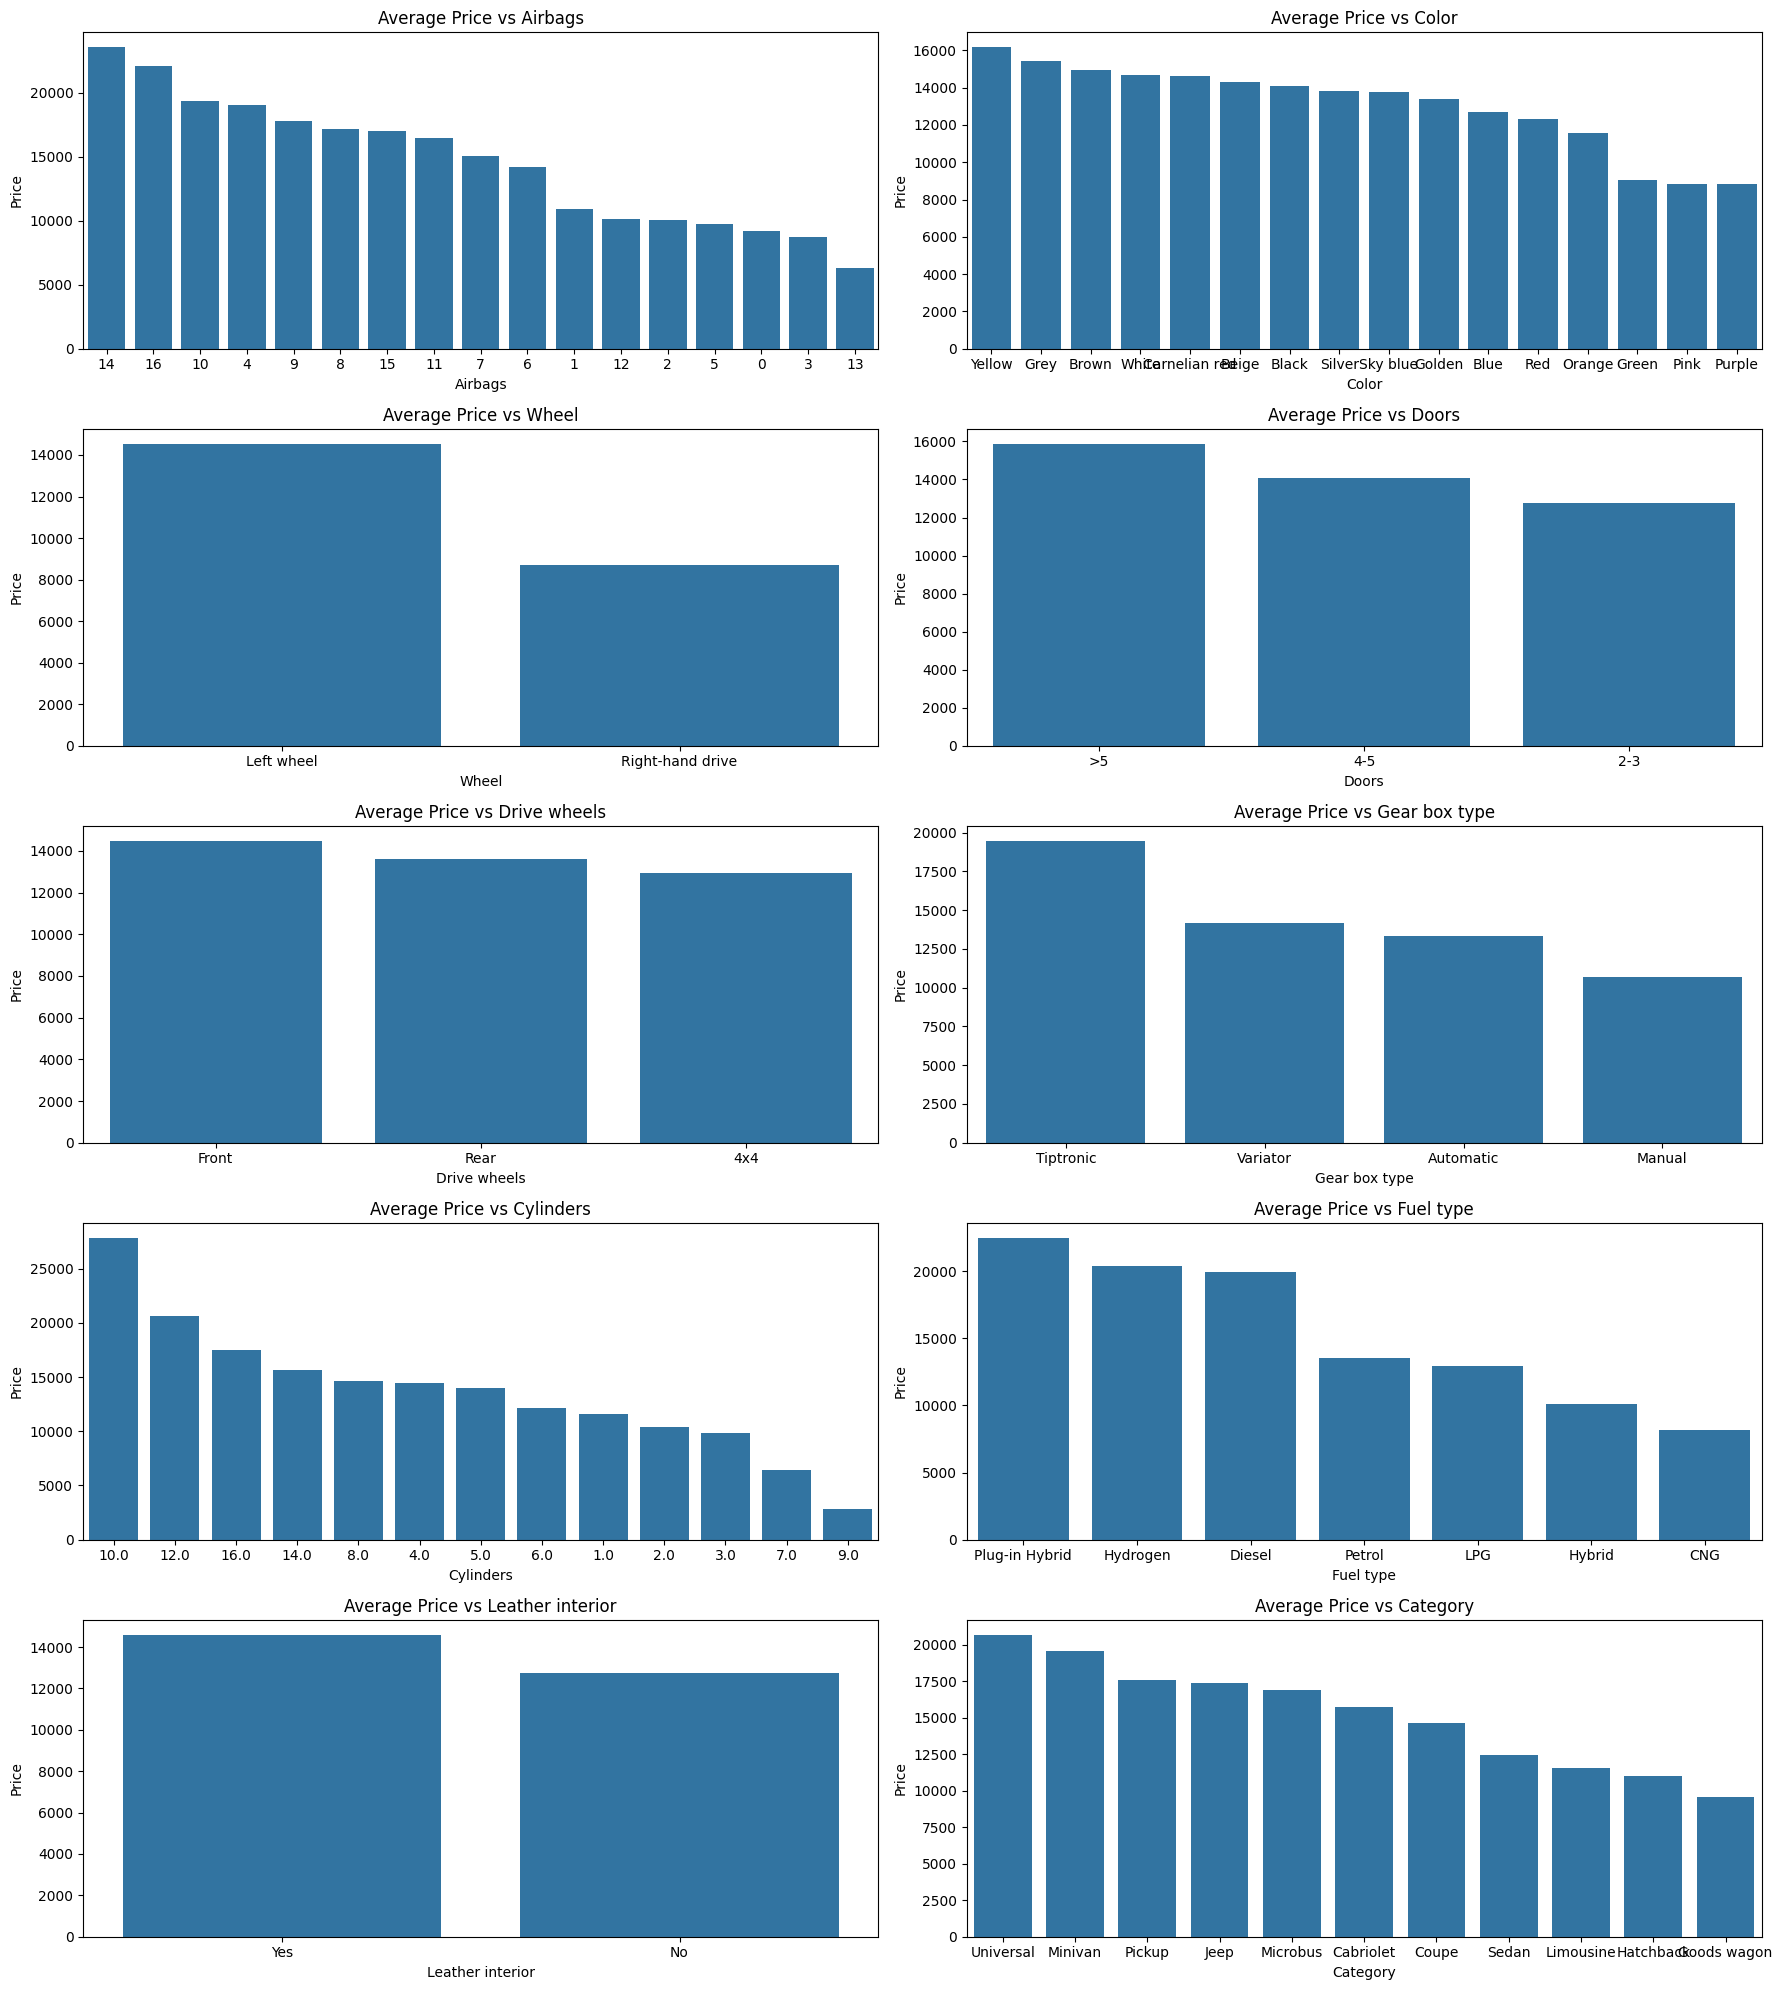

In [62]:
# List of columns to plot
columns_to_plot = ['Airbags', 'Color', 'Wheel', 'Doors', 'Drive wheels', 'Gear box type', 'Cylinders', 'Fuel type', 'Leather interior', 'Category']

# Create a 5x2 subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    # Sort the data by the average price in descending order
    sorted_data = df.groupby(column)['Price'].mean().sort_values(ascending=False).index

    sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
    axes[i].set_title(f'Average Price vs {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [63]:
# Assuming df is your DataFrame
df['Age'] = 2024 - df['Prod. year']

# Assuming df is your DataFrame
df = df.drop(columns=['Prod. year'])

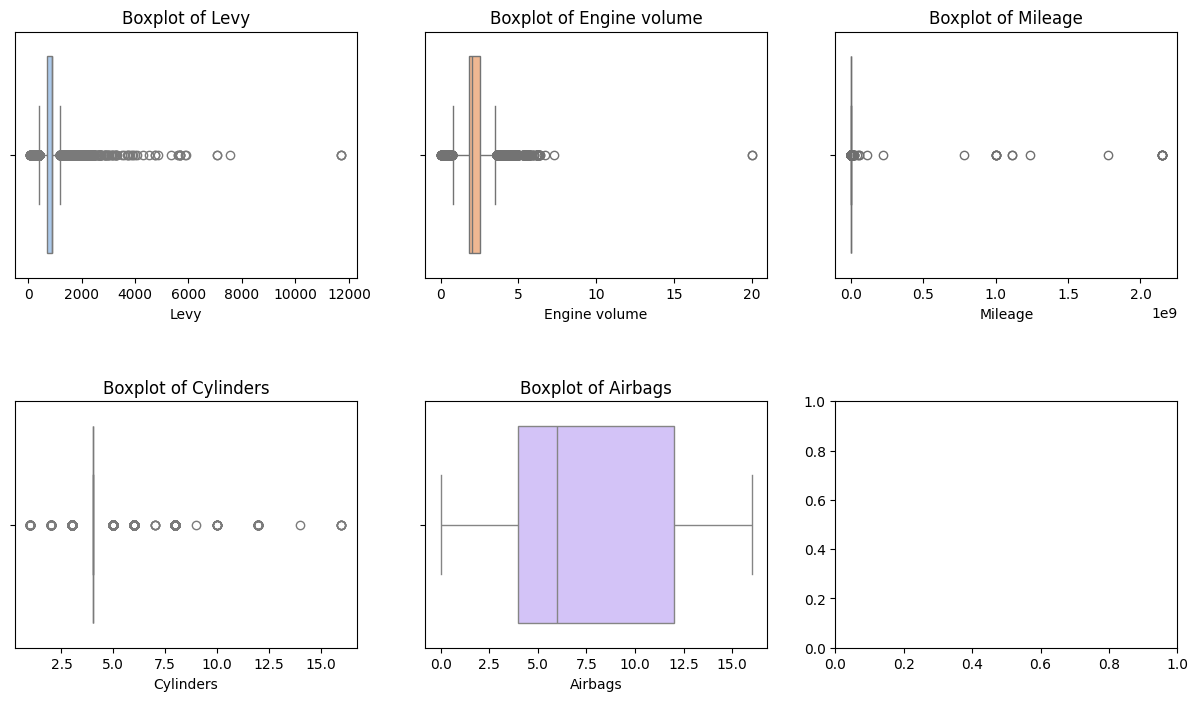

In [64]:
# List of columns for boxplots
columns_for_boxplots = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define a colorful palette for the boxplots
color_palette = sns.color_palette("pastel")

# Create boxplots for each column
for i, column in enumerate(columns_for_boxplots):
    sns.boxplot(x=df[column], ax=axes[i], color=color_palette[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.show()

In [65]:
# List of columns to check for outliers
columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders']# Not including Airbags since distro seems normal

# Dictionary to store outlier counts
outlier_counts = {}

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    # Remove outliers from the DataFrame
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned, outlier_count

# Iterate over columns, remove outliers, and store counts
for column in columns_to_check:
    df, count = remove_outliers_iqr(df, column)
    outlier_counts[column] = count

# Display outlier counts
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier Counts:
Levy: 2692
Engine volume: 335
Mileage: 547
Cylinders: 2597


In [66]:
df.info() # after removal

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11698 entries, 2 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             11698 non-null  int64   
 1   Levy              11698 non-null  float64 
 2   Manufacturer      11698 non-null  object  
 3   Model             11698 non-null  object  
 4   Category          11698 non-null  object  
 5   Leather interior  11698 non-null  object  
 6   Fuel type         11698 non-null  object  
 7   Engine volume     11698 non-null  float64 
 8   Mileage           11698 non-null  float64 
 9   Cylinders         11698 non-null  float64 
 10  Gear box type     11698 non-null  object  
 11  Drive wheels      11698 non-null  object  
 12  Doors             11698 non-null  category
 13  Wheel             11698 non-null  object  
 14  Color             11698 non-null  object  
 15  Airbags           11698 non-null  int64   
 16  Turbo             1169

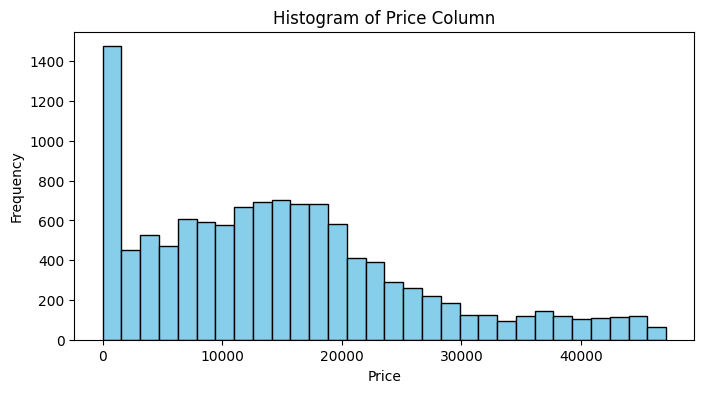

In [67]:
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(8, 4))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [68]:
# Assuming df_encoded is your DataFrame
rows_with_low_price = df[df['Price'] < 500]

# Display the DataFrame with horizontal scrolling
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(rows_with_low_price)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
27,30,906.299205,TOYOTA,Prius,Sedan,No,Hybrid,1.5,169000.0,4.0,Automatic,Front,4-5,Left wheel,White,8,0,16
53,392,1017.000000,MERCEDES-BENZ,E 300,Sedan,Yes,Petrol,2.0,1600.0,4.0,Automatic,Rear,4-5,Left wheel,Black,12,0,7
68,314,779.000000,TOYOTA,Camry,Sedan,Yes,Hybrid,2.5,225510.0,4.0,Automatic,Front,4-5,Left wheel,White,12,0,11
79,220,1185.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,193614.0,4.0,Automatic,Front,4-5,Left wheel,White,0,0,15
117,94,906.299205,HONDA,FIT,Hatchback,No,Petrol,1.5,178000.0,4.0,Variator,Front,4-5,Right-hand drive,Silver,4,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,470,831.000000,HYUNDAI,Elantra,Sedan,Yes,Petrol,1.6,25635.0,4.0,Automatic,Front,4-5,Left wheel,Black,12,0,7
19218,30,906.299205,NISSAN,Note,Hatchback,No,Petrol,1.3,0.0,4.0,Automatic,Front,4-5,Right-hand drive,Green,9,0,18
19229,50,906.299205,TOYOTA,Prius,Hatchback,No,Hybrid,1.5,150000.0,4.0,Automatic,Front,4-5,Left wheel,Silver,6,0,16
19230,470,645.000000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,307325.0,4.0,Automatic,Front,4-5,Left wheel,Silver,12,0,13


In [69]:
# Filter to leave rows where price is greater than 500
df = df[df['Price'] >= 500]
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
2,8467,906.299205,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2,0,18
3,3607,862.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0,0,13
4,11726,446.000000,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0,10
5,39493,891.000000,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,4-5,Left wheel,White,4,0,8
6,1803,761.000000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909.0,4.0,Automatic,Front,4-5,Left wheel,White,12,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,KIA,Optima ex,Sedan,Yes,Petrol,2.4,35800.0,4.0,Automatic,Front,4-5,Left wheel,Black,12,0,10
19225,8781,1107.000000,OPEL,Combo,Goods wagon,No,Diesel,1.7,236000.0,4.0,Manual,Front,4-5,Left wheel,Beige,4,1,17
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2-3,Left wheel,Silver,5,1,25
19233,15681,831.000000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,0,13


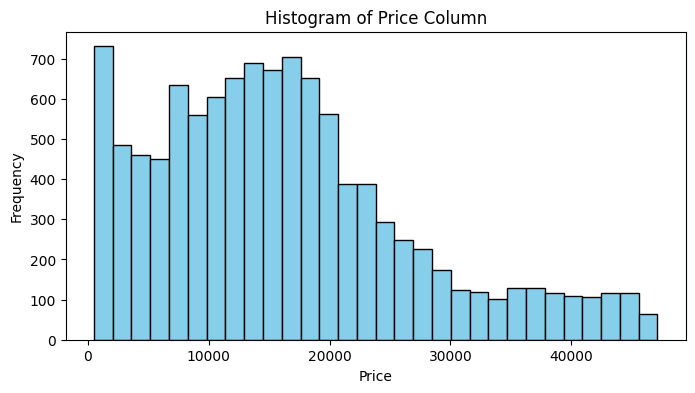

In [70]:
plt.figure(figsize=(8, 4))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**CORRELATION**

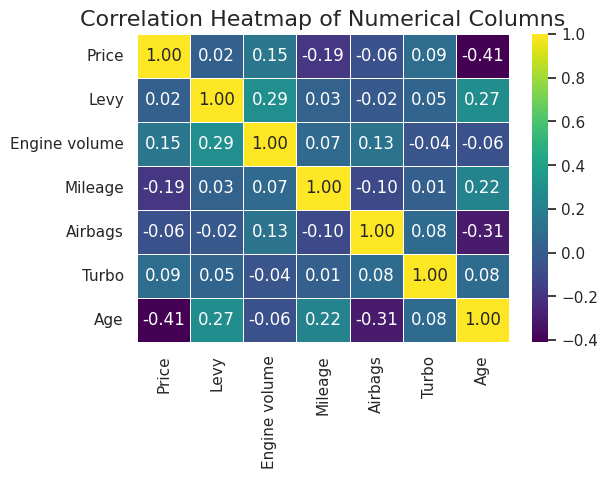

In [71]:
# Select only numerical columns with int64 and float64 data types excluding 'Cylinders'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up Seaborn style
sns.set(style="white")

# Create a heatmap using Seaborn with a different colormap ('viridis')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)

# Show the plot
plt.show()

**Encoding before modeling:** We will try: One hot encode all categorical features. This will create a lot of dimensions, let's see how the model handles it



In [72]:
df1=df #df1 to be used for Leaveoneout encoding
df2=df #df2 to be used for Target encoding

**Encoding:** One hot encoding all categorical columns

In [73]:
from sklearn.preprocessing import  OneHotEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)
df_encoded

Price         Levy  Engine volume   Mileage  Cylinders  Airbags  Turbo  \
2       8467   906.299205            1.3  200000.0        4.0        2      0   
3       3607   862.000000            2.5  168966.0        4.0        0      0   
4      11726   446.000000            1.3   91901.0        4.0        4      0   
5      39493   891.000000            2.0  160931.0        4.0        4      0   
6       1803   761.000000            1.8  258909.0        4.0       12      0   
...      ...          ...            ...       ...        ...      ...    ...   
19224  19130   906.299205            2.4   35800.0        4.0       12      0   
19225   8781  1107.000000            1.7  236000.0        4.0        4      1   
19232   8467   906.299205            2.0  300000.0        4.0        5      1   
19233  15681   831.000000            2.4  161600.0        4.0        8      0   
19234  26108   836.000000            2.0  116365.0        4.0        4      0   

       Age  Manufacturer_ALFA ROMEO  Manufacturer_AUDI  Manufacturer_BMW  \
2       18                        0                  0                 0   
3       13                        0                  0                 0   
4       10                        0                  0                 0   
5        8                        0                  0                 0   
6       14                        0                  0                 0   
...    ...                      ...                ...               ...   
19224   10                        0                  0                 0   
19225   17                        0                  0                 0   
19232   25                        0                  0                 0   
19233   13                        0                  0                 0   
19234   14                        0                  0                 0   

       Manufacturer_BUICK  Manufacturer_CADILLAC  Manufacturer_CHEVROLET  \
2                       0                      0                       0   
3                       0                      0                       0   
4                       0                      0                       0   
5                       0                      0                       0   
6                       0                      0                       0   
...                   ...                    ...                     ...   
19224                   0                      0                       0   
19225                   0                      0                       0   
19232                   0                      0                       0   
19233                   0                      0                       0   
19234                   0                      0                       0   

       Manufacturer_CHRYSLER  Manufacturer_CITROEN  Manufacturer_DAEWOO  \
2                          0                     0                    0   
3                          0                     0                    0   
4                          0                     0                    0   
5                          0                     0                    0   
6                          0                     0                    0   
...                      ...                   ...                  ...   
19224                      0                     0                    0   
19225                      0                     0                    0   
19232                      0                     0                    0   
19233                      0                     0                    0   
19234                      0                     0                    0   

       Manufacturer_DAIHATSU  Manufacturer_DODGE  Manufacturer_FIAT  \
2                          0                   0                  0   
3                          0                   0                  0   
4                          0                   0                  0   
5                      

In [74]:
# Loop through columns
for column in df_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if df_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        df_encoded[column] = df_encoded[column].astype(int)

df_encoded

Price         Levy  Engine volume   Mileage  Cylinders  Airbags  Turbo  \
2       8467   906.299205            1.3  200000.0        4.0        2      0   
3       3607   862.000000            2.5  168966.0        4.0        0      0   
4      11726   446.000000            1.3   91901.0        4.0        4      0   
5      39493   891.000000            2.0  160931.0        4.0        4      0   
6       1803   761.000000            1.8  258909.0        4.0       12      0   
...      ...          ...            ...       ...        ...      ...    ...   
19224  19130   906.299205            2.4   35800.0        4.0       12      0   
19225   8781  1107.000000            1.7  236000.0        4.0        4      1   
19232   8467   906.299205            2.0  300000.0        4.0        5      1   
19233  15681   831.000000            2.4  161600.0        4.0        8      0   
19234  26108   836.000000            2.0  116365.0        4.0        4      0   

       Age  Manufacturer_ALFA ROMEO  Manufacturer_AUDI  Manufacturer_BMW  \
2       18                        0                  0                 0   
3       13                        0                  0                 0   
4       10                        0                  0                 0   
5        8                        0                  0                 0   
6       14                        0                  0                 0   
...    ...                      ...                ...               ...   
19224   10                        0                  0                 0   
19225   17                        0                  0                 0   
19232   25                        0                  0                 0   
19233   13                        0                  0                 0   
19234   14                        0                  0                 0   

       Manufacturer_BUICK  Manufacturer_CADILLAC  Manufacturer_CHEVROLET  \
2                       0                      0                       0   
3                       0                      0                       0   
4                       0                      0                       0   
5                       0                      0                       0   
6                       0                      0                       0   
...                   ...                    ...                     ...   
19224                   0                      0                       0   
19225                   0                      0                       0   
19232                   0                      0                       0   
19233                   0                      0                       0   
19234                   0                      0                       0   

       Manufacturer_CHRYSLER  Manufacturer_CITROEN  Manufacturer_DAEWOO  \
2                          0                     0                    0   
3                          0                     0                    0   
4                          0                     0                    0   
5                          0                     0                    0   
6                          0                     0                    0   
...                      ...                   ...                  ...   
19224                      0                     0                    0   
19225                      0                     0                    0   
19232                      0                     0                    0   
19233                      0                     0                    0   
19234                      0                     0                    0   

       Manufacturer_DAIHATSU  Manufacturer_DODGE  Manufacturer_FIAT  \
2                          0                   0                  0   
3                          0                   0                  0   
4                          0                   0                  0   
5                      

**Modelling:** For each iteriation with different encodings, we will run 3 different baseline models. Scale data after data split and display MAE and R2 on training and evaluation data. We will also plot actual vs predictions on a kde plot along with feature importance charts.

In [75]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Separate the target variable (Price) and independent variables
X = df_encoded.drop(columns=['Price','Cylinders'])
y = df_encoded['Price']

# Split the data into training and evaluation sets (70/30 split)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the evaluation data using the same scaler
X_eval_scaled = scaler.transform(X_eval)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Models dictionary
models = {'RandomForest': rf_model, 'XGBoost': xgb_model, 'LightGBM': lgb_model}

# Results dictionary
results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}

# Loop through models
for model_name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    # Predictions on the scaled training set
    y_train_pred = model.predict(X_train_scaled)

    # Predictions on the scaled evaluation set
    y_eval_pred = model.predict(X_eval_scaled)

    # Calculate MAE and R-squared for training and evaluation sets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_eval = mean_absolute_error(y_eval, y_eval_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_eval = r2_score(y_eval, y_eval_pred)

    # Append results to the dictionary
    results['Model'].append(model_name)
    results['MAE (Train)'].append(mae_train)
    results['MAE (Test)'].append(mae_eval)
    results['R-squared (Train)'].append(r2_train)
    results['R-squared (Test)'].append(r2_eval)
    # Create DataFrame from results dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 7565, number of used features: 129
[LightGBM] [Info] Start training from score 16251.225248


,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,RandomForest,1094.507306,2911.184841,0.974053,0.809829
1,XGBoost,2539.849052,3310.313359,0.896371,0.796587
2,LightGBM,2785.484610,3212.297195,0.868723,0.807651


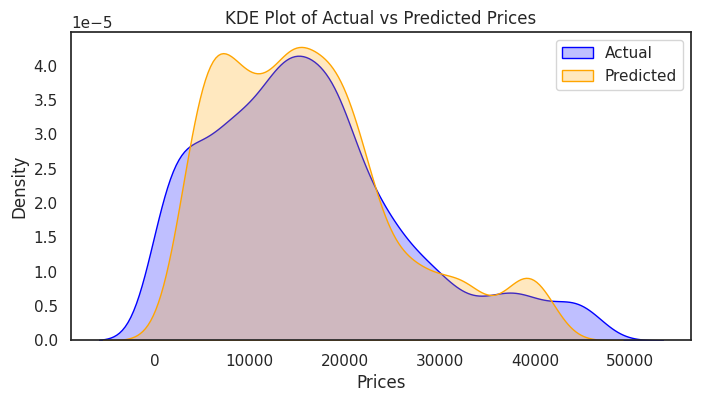

In [76]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': y_eval, 'Predicted': y_eval_pred})

# Plot the KDE plot for actual vs predicted values
plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()

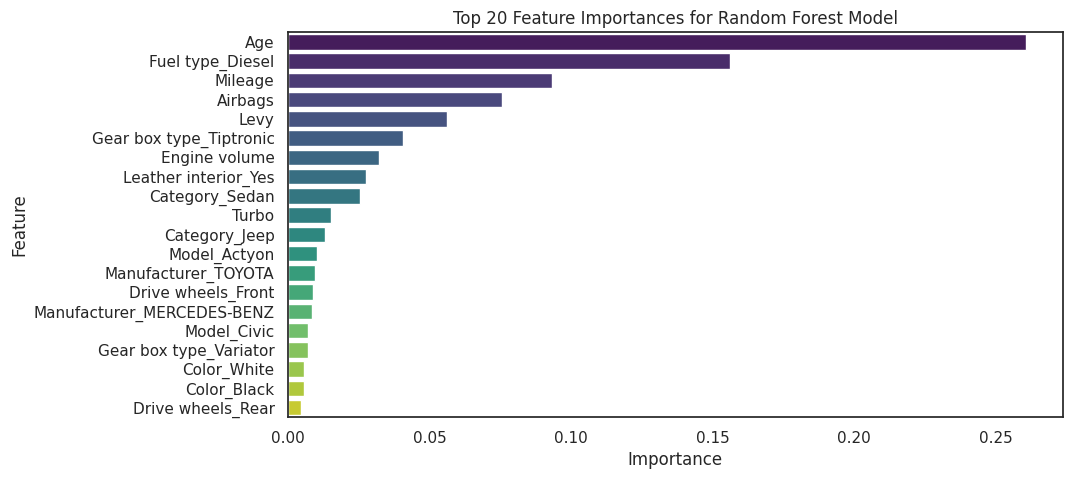

In [77]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get the column names from the original DataFrame (X_train)
feature_names = X_train.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Plot the feature importances for the top 20 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()